In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [77]:
filename: str = '..\\..\\simulation_result.csv'
new_filename: str = '..\\..\\baseline_simulation_result.csv'
df = pd.read_csv(filename, index_col=0)
df2 = pd.read_csv(new_filename, index_col=0)
df.head(5), df2.head(5)

(   iteration   id  production  consumption  stored_kwh  wallet  \
 0          0  ap1     98.5720      44.7935        0.01     0.0   
 1          0  ap2     17.3160      44.1711        5.00     0.0   
 2          0  ap3     81.2360      43.9023        5.00     0.0   
 3          0  ap4     78.9475      43.9878        5.00     0.0   
 4          0  cs1     17.3160      52.6177        5.00     0.0   
 
                            trades_from  amount_from_city  amount_to_city  \
 0                                  NaN            5.8296          0.0000   
 1   ap1:10.6055-ap3:10.051-ap4:10.2607            0.0000          3.6473   
 2                                  NaN            4.5883          0.0000   
 3                                  NaN            4.3310          0.0000   
 4  ap1:16.5113-ap3:12.4651-ap4:11.5181            0.0000          4.7772   
 
    central_battery_tax  
 0                  0.0  
 1                  0.0  
 2                  0.0  
 3                  0.0  
 4

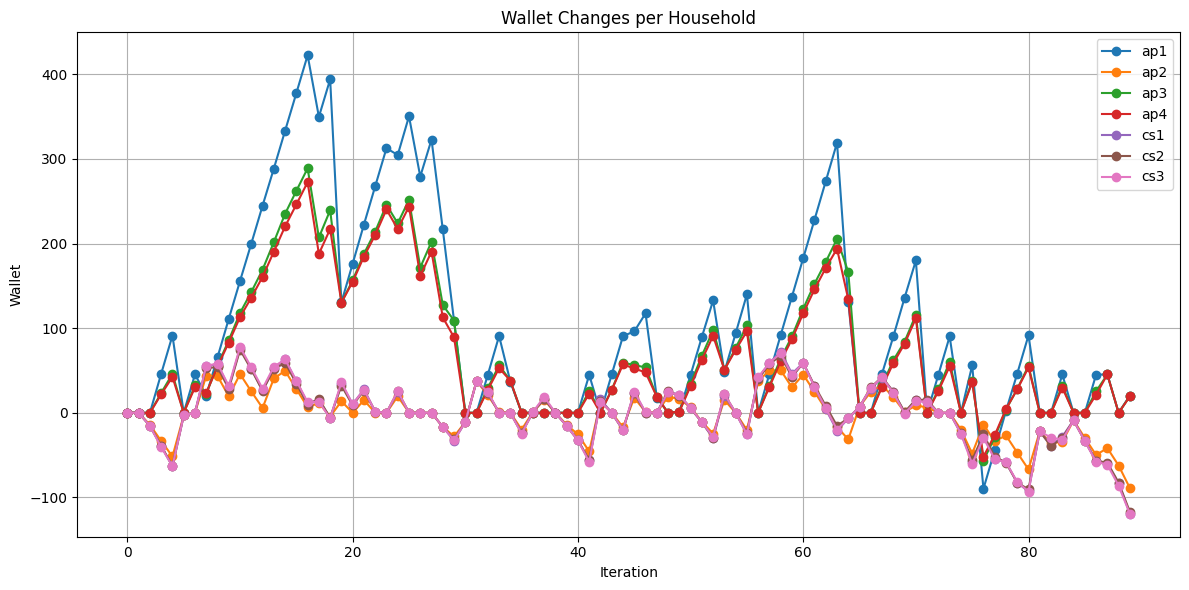

In [91]:
plt.figure(figsize=(12, 6))

for id_, group in df.groupby('id'):
    plt.plot(group['iteration'], group['wallet'], marker='o', label=id_)

plt.title('Wallet Changes per Household')
plt.xlabel('Iteration')
plt.ylabel('Wallet')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
ids = df['id'].unique()
trade_matrix = pd.DataFrame(0, index=ids, columns=ids, dtype=float)

for _, row in df.iterrows():
    if pd.isna(row['trades_from']):
        continue
    trades = row['trades_from'].split('-')
    for trade in trades:
        if ':' in trade:
            target, amount = trade.split(':')
            try:
                trade_matrix.loc[row['id'], target] += float(amount)
            except:
                pass

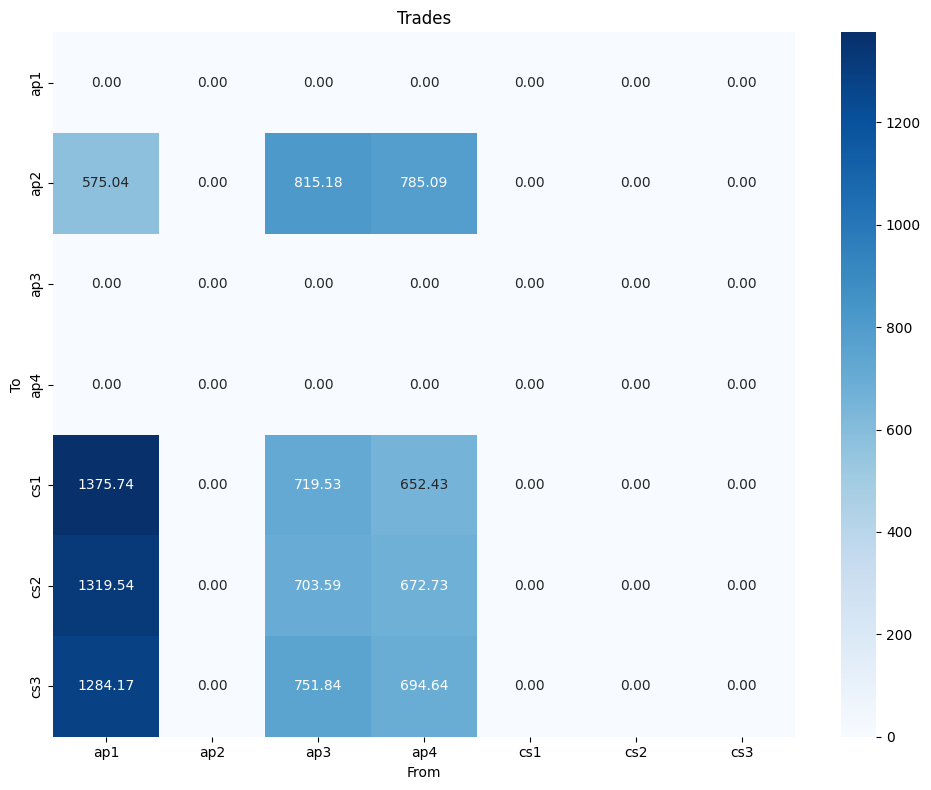

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(trade_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Trades')
plt.xlabel('From')
plt.ylabel('To')
plt.tight_layout()
plt.show()

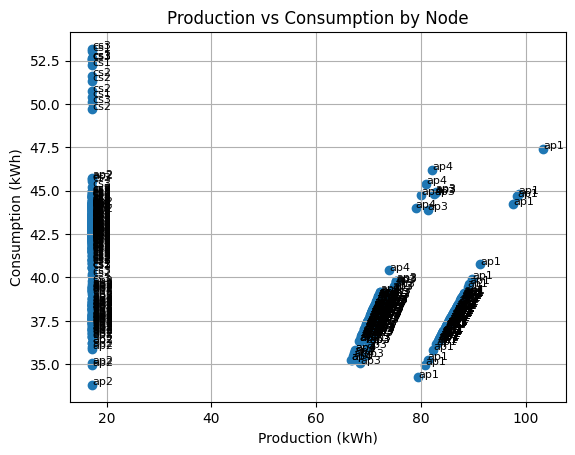

In [81]:
plt.figure()
plt.scatter(df['production'], df['consumption'])
for i, row in df.iterrows():
    plt.text(row['production'], row['consumption'], row['id'], fontsize=8)
plt.title('Production vs Consumption by Node')
plt.xlabel('Production (kWh)')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()

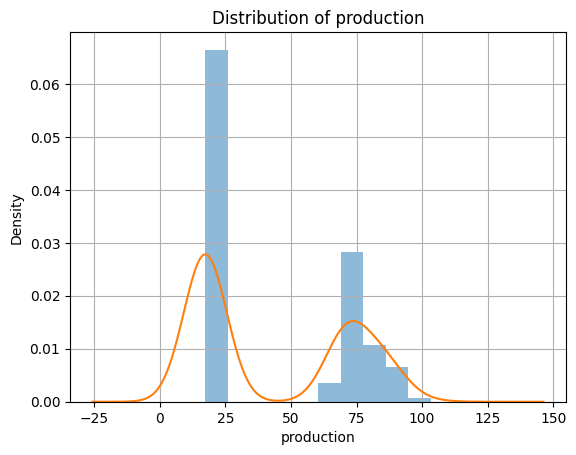

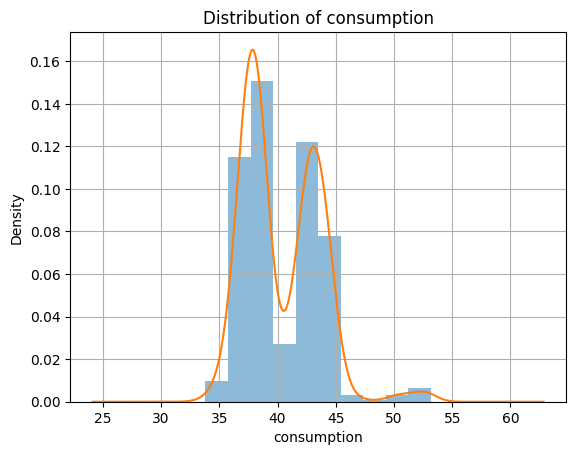

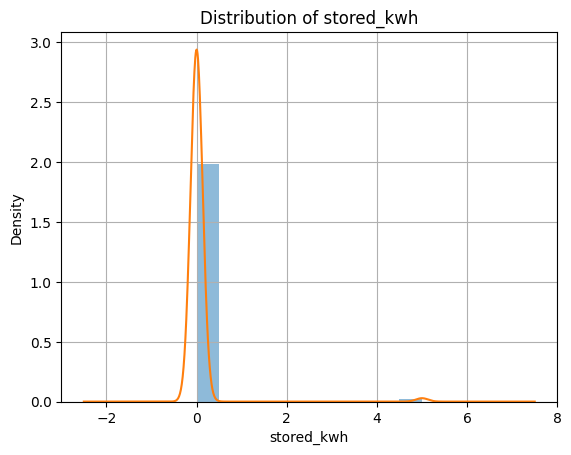

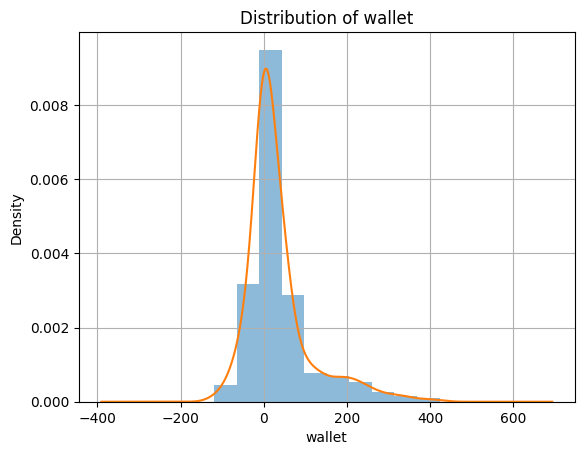

In [82]:
vars_to_plot = ['production', 'consumption', 'stored_kwh', 'wallet']
for var in vars_to_plot:
    plt.figure()
    df[var].plot(kind='hist', density=True, alpha=0.5)
    df[var].plot(kind='kde')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

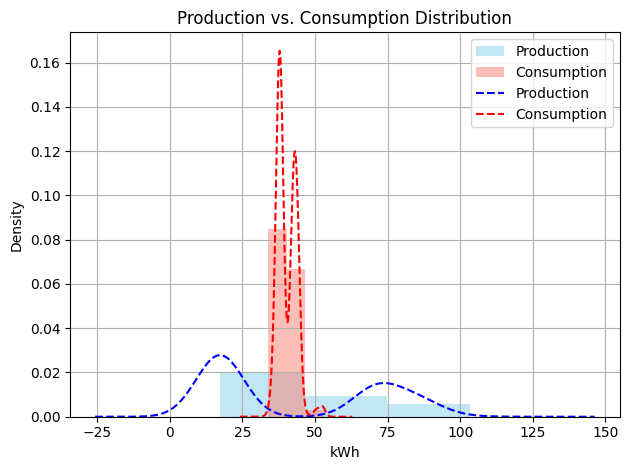

In [83]:
plt.figure()
plt.hist(df['production'], bins=3, density=True, alpha=0.5, label='Production', color='skyblue')
plt.hist(df['consumption'], bins=3, density=True, alpha=0.5, label='Consumption', color='salmon')
df['production'].plot(kind='kde', label='Production', linestyle='--', color='blue')
df['consumption'].plot(kind='kde', label='Consumption', linestyle='--', color='red')
plt.title('Production vs. Consumption Distribution')
plt.xlabel('kWh')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

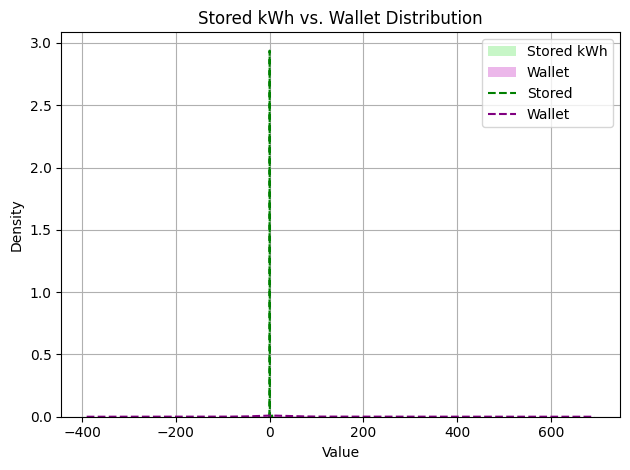

In [84]:
plt.figure()
plt.hist(df['stored_kwh'], bins=8, density=True, alpha=0.5, label='Stored kWh', color='lightgreen')
plt.hist(df['wallet'], bins=8, density=True, alpha=0.5, label='Wallet', color='orchid')
df['stored_kwh'].plot(kind='kde', label='Stored', linestyle='--', color='green')
df['wallet'].plot(kind='kde', label='Wallet', linestyle='--', color='purple')
plt.title('Stored kWh vs. Wallet Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

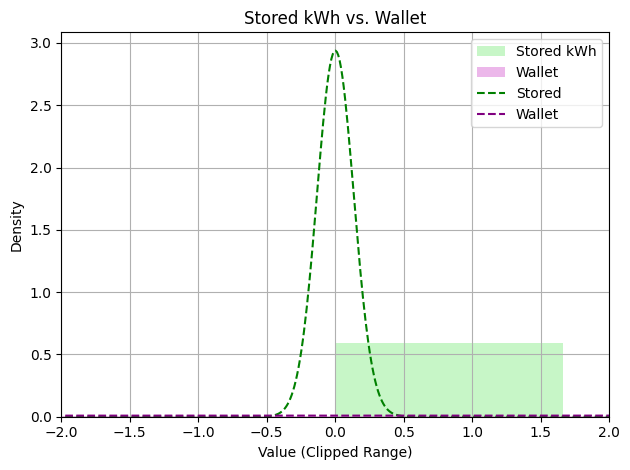

In [90]:
plt.figure()
plt.hist(df['stored_kwh'], bins=3, density=True, alpha=0.5, label='Stored kWh', color='lightgreen')
plt.hist(df['wallet'], bins=3, density=True, alpha=0.5, label='Wallet', color='orchid')
df['stored_kwh'].plot(kind='kde', label='Stored', linestyle='--', color='green')
df['wallet'].plot(kind='kde', label='Wallet', linestyle='--', color='purple')

# Force X-axis limits to [-20k, 20k]
plt.xlim(-2, 2)  # Cuts off values outside this range

plt.title('Stored kWh vs. Wallet')
plt.xlabel('Value (Clipped Range)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

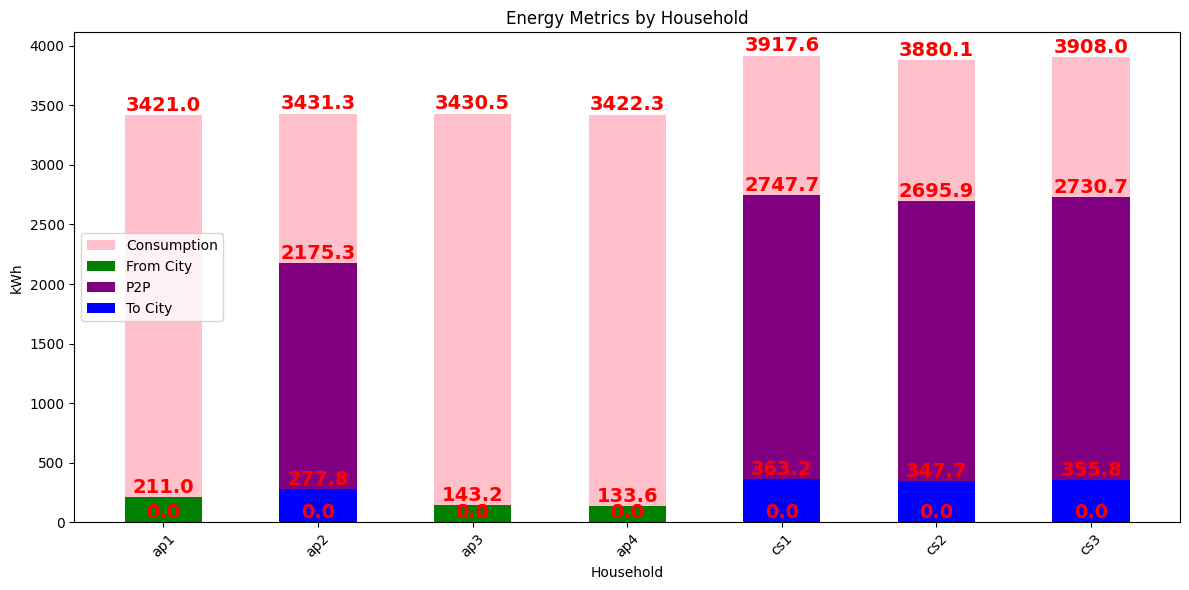

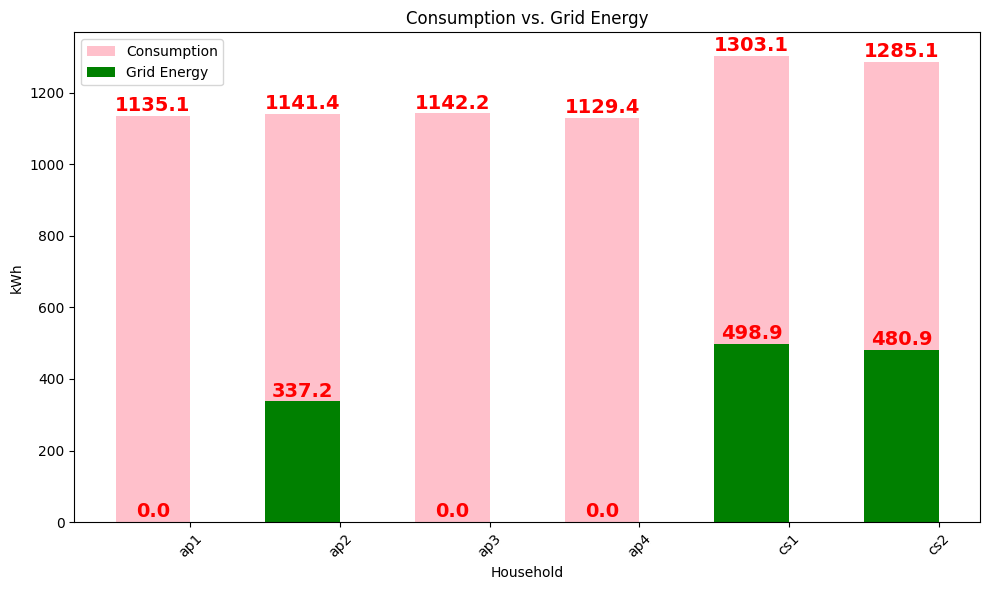

In [86]:
# Group and sum values from df1 (with 'amount_from_city') by household
df1_grouped = df.groupby('id')[['consumption', 'amount_from_city', 'amount_to_city', 'trades_from']].sum().reset_index()

# Group and sum values from df2 (with 'grid_energy') by household
df2_grouped = df2.groupby('id')[['consumption', 'grid_energy']].sum().reset_index()

df['trades_from'] = df['trades_from'].fillna('')
def sum_trades(trades_str):
    if trades_str == '':
        return 0
    return sum(float(part.split(':')[1]) for part in trades_str.split('-'))

df['trades_from_sum'] = df['trades_from'].apply(sum_trades)

# Group by household ID and sum relevant columns
df1_grouped = df.groupby('id')[['consumption', 'amount_from_city', 'amount_to_city', 'trades_from_sum']].sum().reset_index()

bar_width = 0.5
x = list(range(len(df1_grouped)))  # central x positions
offsets = [0, 0, 0, 0]  # for 4 bars centered

plt.figure(figsize=(12, 6))

bars1 = plt.bar([i + offsets[0]*bar_width for i in x], df1_grouped['consumption'], width=bar_width, label='Consumption', color='pink')
bars2 = plt.bar([i + offsets[1]*bar_width for i in x], df1_grouped['amount_from_city'], width=bar_width, label='From City', color='green')
bars4 = plt.bar([i + offsets[3]*bar_width for i in x], df1_grouped['trades_from_sum'], width=bar_width, label='P2P', color='purple')
bars3 = plt.bar([i + offsets[2]*bar_width for i in x], df1_grouped['amount_to_city'], width=bar_width, label='To City', color='blue')

# Annotate values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 2,
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=14,
            color='red',
            fontweight='bold'
        )

plt.xlabel('Household')
plt.ylabel('kWh')
plt.title('Energy Metrics by Household')
plt.xticks(x, df1_grouped['id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for df2
plt.figure(figsize=(10, 6))
x = range(len(df2_grouped))

bar2_1 = plt.bar([i + offsets[0]*bar_width for i in x], df2_grouped['consumption'], width=bar_width, label='Consumption', color='pink')
bar2_2 = plt.bar([i + offsets[0]*bar_width for i in x], df2_grouped['grid_energy'], width=bar_width, label='Grid Energy', color='green')

for bars in [bar2_1, bar2_2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 2,
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=14,
            color='red',
            fontweight='bold'
        )

plt.xlabel('Household')
plt.ylabel('kWh')
plt.title('Consumption vs. Grid Energy')
plt.xticks([i + bar_width / 2 for i in x], df2_grouped['id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

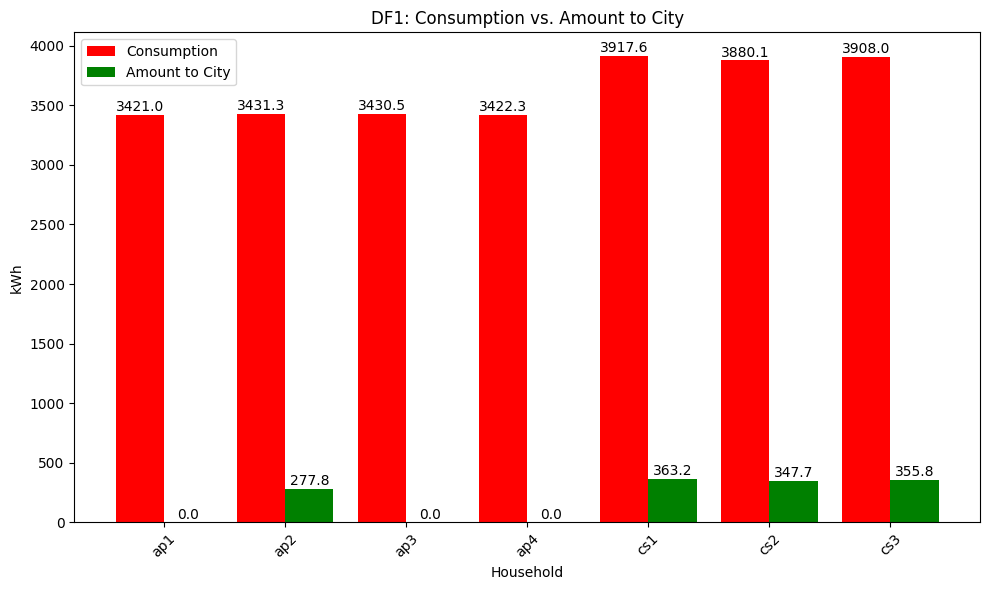

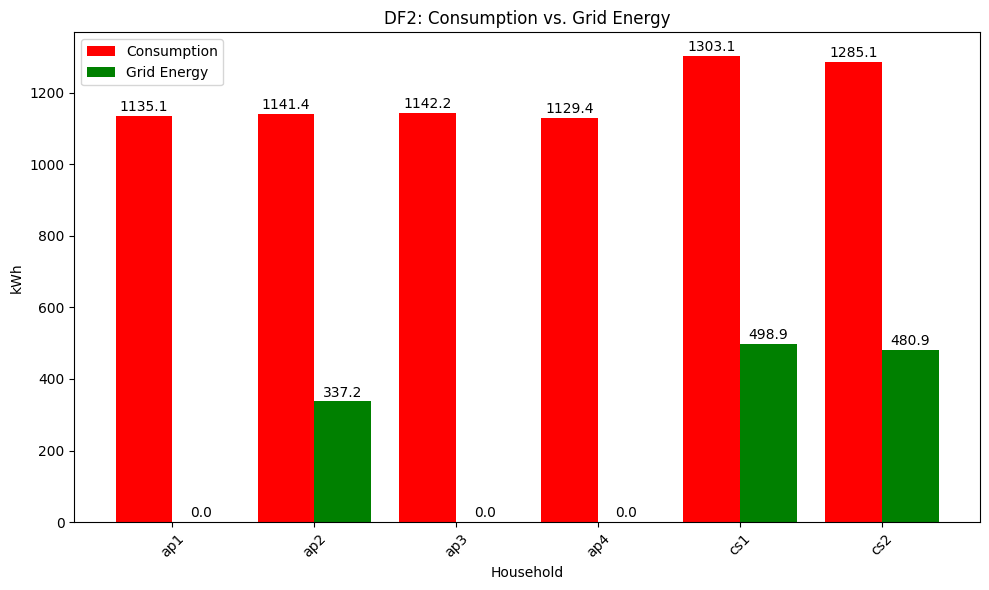

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload cleaned versions of both datasets from earlier steps
df1 = df.copy()
df2 = df2.copy()

# Group and sum values from df1 (with 'amount_from_city') by household
df1_grouped = df1.groupby('id')[['consumption', 'amount_from_city', 'amount_to_city']].sum().reset_index()

# Group and sum values from df2 (with 'grid_energy') by household
df2_grouped = df2.groupby('id')[['consumption', 'grid_energy']].sum().reset_index()

# Plot for df1
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(df1_grouped))

bars1 = plt.bar(x, df1_grouped['consumption'], width=bar_width, label='Consumption', color='red')
bars2 = plt.bar([i + bar_width for i in x], df1_grouped['amount_to_city'], width=bar_width, label='Amount to City', color='green')

# Annotate bars with values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval:.1f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval:.1f}', ha='center', va='bottom')

plt.xlabel('Household')
plt.ylabel('kWh')
plt.title('DF1: Consumption vs. Amount to City')
plt.xticks([i + bar_width / 2 for i in x], df1_grouped['id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for df2
plt.figure(figsize=(10, 6))
x = range(len(df2_grouped))

bars3 = plt.bar(x, df2_grouped['consumption'], width=bar_width, label='Consumption', color='red')
bars4 = plt.bar([i + bar_width for i in x], df2_grouped['grid_energy'], width=bar_width, label='Grid Energy', color='green')

# Annotate bars with values
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval:.1f}', ha='center', va='bottom')

for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval:.1f}', ha='center', va='bottom')

plt.xlabel('Household')
plt.ylabel('kWh')
plt.title('DF2: Consumption vs. Grid Energy')
plt.xticks([i + bar_width / 2 for i in x], df2_grouped['id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
